In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import *
from nltk.text import Text
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

## Data Exploration

In [2]:
file_path = "ESConv.json"

with open(file_path, "r", encoding="utf-8") as file:
    dataset = json.load(file)

In [3]:
# Access and print the first conversation
conversation = dataset[0]
print(conversation)

{'experience_type': 'Previous Experience', 'emotion_type': 'anxiety', 'problem_type': 'job crisis', 'situation': 'I hate my job but I am scared to quit and seek a new career.', 'survey_score': {'seeker': {'initial_emotion_intensity': '5', 'empathy': '5', 'relevance': '5', 'final_emotion_intensity': '1'}, 'supporter': {'relevance': '5'}}, 'dialog': [{'speaker': 'seeker', 'annotation': {}, 'content': 'Hello\n'}, {'speaker': 'supporter', 'annotation': {'strategy': 'Question'}, 'content': 'Hello, what would you like to talk about?'}, {'speaker': 'seeker', 'annotation': {}, 'content': 'I am having a lot of anxiety about quitting my current job. It is too stressful but pays well\n'}, {'speaker': 'supporter', 'annotation': {'strategy': 'Question'}, 'content': 'What makes your job stressful for you?'}, {'speaker': 'seeker', 'annotation': {'feedback': '5'}, 'content': 'I have to deal with many people in hard financial situations and it is upsetting \n'}, {'speaker': 'supporter', 'annotation': {

In [4]:
# Access specific fields within the first conversation
experience_type = conversation["experience_type"]
emotion_type = conversation["emotion_type"]
problem_type = conversation["problem_type"]
situation = conversation["situation"]
survey_score = conversation["survey_score"]
survey_score_seeker = conversation["survey_score"]["seeker"]
survey_score_supporter = conversation["survey_score"]["supporter"]
dialog = conversation["dialog"]

In [5]:
experience_type

'Previous Experience'

In [6]:
emotion_type

'anxiety'

In [7]:
problem_type

'job crisis'

In [8]:
situation

'I hate my job but I am scared to quit and seek a new career.'

In [9]:
survey_score

{'seeker': {'initial_emotion_intensity': '5',
  'empathy': '5',
  'relevance': '5',
  'final_emotion_intensity': '1'},
 'supporter': {'relevance': '5'}}

In [10]:
survey_score_seeker

{'initial_emotion_intensity': '5',
 'empathy': '5',
 'relevance': '5',
 'final_emotion_intensity': '1'}

In [11]:
survey_score_supporter

{'relevance': '5'}

In [12]:
dialog

[{'speaker': 'seeker', 'annotation': {}, 'content': 'Hello\n'},
 {'speaker': 'supporter',
  'annotation': {'strategy': 'Question'},
  'content': 'Hello, what would you like to talk about?'},
 {'speaker': 'seeker',
  'annotation': {},
  'content': 'I am having a lot of anxiety about quitting my current job. It is too stressful but pays well\n'},
 {'speaker': 'supporter',
  'annotation': {'strategy': 'Question'},
  'content': 'What makes your job stressful for you?'},
 {'speaker': 'seeker',
  'annotation': {'feedback': '5'},
  'content': 'I have to deal with many people in hard financial situations and it is upsetting \n'},
 {'speaker': 'supporter',
  'annotation': {'strategy': 'Question'},
  'content': 'Do you help your clients to make it to a better financial situation?'},
 {'speaker': 'seeker',
  'annotation': {},
  'content': 'I do, but often they are not going to get back to what they want. Many people are going to lose their home when safeguards are lifted \n'},
 {'speaker': 'suppo

In [13]:
dialog = conversation["dialog"]
for message in dialog:
    speaker = message["speaker"]
    content = message["content"]
    print(f"{speaker}: {content}")

seeker: Hello

supporter: Hello, what would you like to talk about?
seeker: I am having a lot of anxiety about quitting my current job. It is too stressful but pays well

supporter: What makes your job stressful for you?
seeker: I have to deal with many people in hard financial situations and it is upsetting 

supporter: Do you help your clients to make it to a better financial situation?
seeker: I do, but often they are not going to get back to what they want. Many people are going to lose their home when safeguards are lifted 

supporter: But you offer them a better future than what they have currently. It may not be what they wanted, but it helps them in the long run.
seeker: That is true but sometimes I feel like I should put my feelings and health first 

supporter: I can understand that. 
supporter: Is there another job that would pay you close to what you currently make?
seeker: Probably not. I was with the same company for a long time and I consistently get a bonus every year 


In [14]:
# Access the seeker's first question
seeker_question1 = conversation["seeker_question1"]
print("Seeker's question 1:", seeker_question1)

# Access the supporter's second question
supporter_question2 = conversation["supporter_question2"]
print("Supporter's question 2:", supporter_question2)

Seeker's question 1: Partner was very supportive
Supporter's question 2: 


In [15]:
def lexical_diversity(text):
    return len(text) / word_type(text)

# bogactwo lexicalne, kazde slowo jest uzywane srednio x razy

In [16]:
def percentage(word, text):
    count = text.count(word) # ile razy zostalo uzyte konkretne slowo
    return 100 * count / len(text)

In [17]:
def word_type(text):
    return len(set(text))
 # w taki sposob moge uzyskac statystyke ile przecietnie pojedynczych slow (word type) uzywa jeden czlowiek na rozmowe

In [18]:
dialog = conversation["dialog"]
first_conv = []
first_conv_str = ""
for message in dialog:
    speaker = message["speaker"]
    content = message["content"]
    if speaker == 'seeker':
        first_conv.append(content.split(' '))
        first_conv_str += content + " "
        
#words = ''.join(first_conv)
# Remove trailing whitespace
first_conv_str = first_conv_str.strip()

single_words_list = [item for sublist in first_conv for item in sublist]

In [19]:
first_conv

[['Hello\n'],
 ['I',
  'am',
  'having',
  'a',
  'lot',
  'of',
  'anxiety',
  'about',
  'quitting',
  'my',
  'current',
  'job.',
  'It',
  'is',
  'too',
  'stressful',
  'but',
  'pays',
  'well\n'],
 ['I',
  'have',
  'to',
  'deal',
  'with',
  'many',
  'people',
  'in',
  'hard',
  'financial',
  'situations',
  'and',
  'it',
  'is',
  'upsetting',
  '\n'],
 ['I',
  'do,',
  'but',
  'often',
  'they',
  'are',
  'not',
  'going',
  'to',
  'get',
  'back',
  'to',
  'what',
  'they',
  'want.',
  'Many',
  'people',
  'are',
  'going',
  'to',
  'lose',
  'their',
  'home',
  'when',
  'safeguards',
  'are',
  'lifted',
  '\n'],
 ['That',
  'is',
  'true',
  'but',
  'sometimes',
  'I',
  'feel',
  'like',
  'I',
  'should',
  'put',
  'my',
  'feelings',
  'and',
  'health',
  'first',
  '\n'],
 ['Probably',
  'not.',
  'I',
  'was',
  'with',
  'the',
  'same',
  'company',
  'for',
  'a',
  'long',
  'time',
  'and',
  'I',
  'consistently',
  'get',
  'a',
  'bonus',
  

In [20]:
single_words_list

['Hello\n',
 'I',
 'am',
 'having',
 'a',
 'lot',
 'of',
 'anxiety',
 'about',
 'quitting',
 'my',
 'current',
 'job.',
 'It',
 'is',
 'too',
 'stressful',
 'but',
 'pays',
 'well\n',
 'I',
 'have',
 'to',
 'deal',
 'with',
 'many',
 'people',
 'in',
 'hard',
 'financial',
 'situations',
 'and',
 'it',
 'is',
 'upsetting',
 '\n',
 'I',
 'do,',
 'but',
 'often',
 'they',
 'are',
 'not',
 'going',
 'to',
 'get',
 'back',
 'to',
 'what',
 'they',
 'want.',
 'Many',
 'people',
 'are',
 'going',
 'to',
 'lose',
 'their',
 'home',
 'when',
 'safeguards',
 'are',
 'lifted',
 '\n',
 'That',
 'is',
 'true',
 'but',
 'sometimes',
 'I',
 'feel',
 'like',
 'I',
 'should',
 'put',
 'my',
 'feelings',
 'and',
 'health',
 'first',
 '\n',
 'Probably',
 'not.',
 'I',
 'was',
 'with',
 'the',
 'same',
 'company',
 'for',
 'a',
 'long',
 'time',
 'and',
 'I',
 'consistently',
 'get',
 'a',
 'bonus',
 'every',
 'year',
 '',
 'I',
 'could',
 'try.',
 'It',
 'mostly',
 'gets',
 'to',
 'me',
 'at',
 'the',
 

In [21]:
single_word_list = [word.replace('\n', '').replace(',', '') for word in single_words_list]

In [22]:
set(single_words_list)

{'',
 '\n',
 'Bye\n',
 'Hello\n',
 'I',
 'It',
 'Many',
 'Maybe',
 'Probably',
 'Sometimes',
 'Thank',
 'Thanks',
 'That',
 'a',
 'about',
 'again',
 'also',
 'am',
 'and',
 'anxiety',
 'are',
 'at',
 'back',
 'big',
 'bonus',
 'but',
 'company',
 'consistently',
 'could',
 'current',
 'day',
 'deal',
 'decision',
 'different',
 'do,',
 'down',
 'end',
 'every',
 'feel',
 'feelings',
 'financial',
 'first',
 'for',
 'get',
 'gets',
 'going',
 'hard',
 'have',
 'having',
 'health',
 'home',
 'if',
 'in',
 'is',
 'it',
 'job.',
 'just',
 'lifted',
 'like',
 'long',
 'lose',
 'lot',
 'many',
 'me',
 'mostly',
 'my',
 'need',
 'not',
 'not.',
 'of',
 'often',
 'pays',
 'people',
 'perspective',
 'put',
 'quitting',
 'really',
 'safeguards',
 'same',
 'should',
 'sit',
 'situations',
 'sometimes',
 'stressful',
 'the',
 'their',
 'they',
 'think',
 'though',
 'time',
 'to',
 'too',
 'true',
 'true.',
 'try.',
 'upsetting',
 'want.',
 'was',
 'well\n',
 'what',
 'when',
 'with',
 'wonder',
 

In [23]:
len(sorted(set(single_words_list)))

105

In [24]:
word_type(single_words_list)

105

In [25]:
lexical_diversity(single_words_list)

1.619047619047619

In [26]:
percentage('I', single_words_list)

5.882352941176471

In [27]:
from nltk import FreqDist

In [28]:
fdist = FreqDist(single_words_list)

In [29]:
fdist.keys()

dict_keys(['Hello\n', 'I', 'am', 'having', 'a', 'lot', 'of', 'anxiety', 'about', 'quitting', 'my', 'current', 'job.', 'It', 'is', 'too', 'stressful', 'but', 'pays', 'well\n', 'have', 'to', 'deal', 'with', 'many', 'people', 'in', 'hard', 'financial', 'situations', 'and', 'it', 'upsetting', '\n', 'do,', 'often', 'they', 'are', 'not', 'going', 'get', 'back', 'what', 'want.', 'Many', 'lose', 'their', 'home', 'when', 'safeguards', 'lifted', 'That', 'true', 'sometimes', 'feel', 'like', 'should', 'put', 'feelings', 'health', 'first', 'Probably', 'not.', 'was', 'the', 'same', 'company', 'for', 'long', 'time', 'consistently', 'bonus', 'every', 'year', '', 'could', 'try.', 'mostly', 'gets', 'me', 'at', 'end', 'day', 'also', 'true.', 'Sometimes', 'wonder', 'if', 'really', 'though', 'Maybe', 'just', 'need', 'sit', 'down', 'think', 'big', 'decision', 'Thank', 'you', 'different', 'perspective', 'Thanks', 'again', 'Bye\n'])

In [30]:
fdist['when']

1

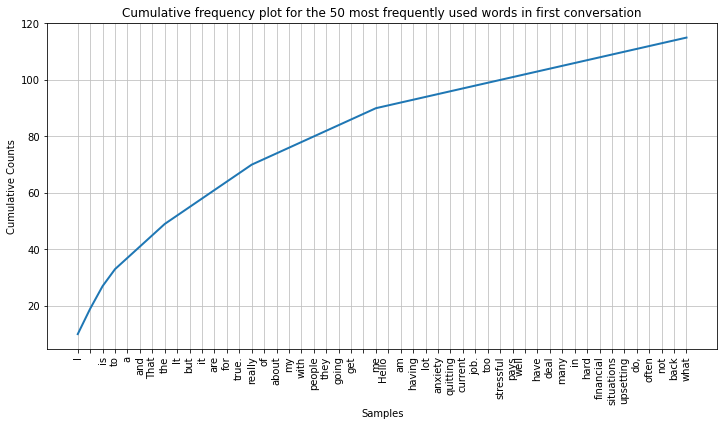

<AxesSubplot:title={'center':'Cumulative frequency plot for the 50 most frequently used words in first conversation'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [31]:
plt.figure(figsize=(12, 6))
plt.title('Cumulative frequency plot for the 50 most frequently used words in first conversation')
fdist.plot(50, cumulative=True)
# Cumulative

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
# Tokenize the string
first_conv_tokens = nltk.word_tokenize(first_conv_str)

# Create a Text object from the tokens
text = Text(first_conv_tokens)

In [34]:
text.concordance('what')

Displaying 1 of 1 matches:
en they are not going to get back to what they want . Many people are going to


In [35]:
text.similar('axiety')

No matches


In [36]:
#text.common_contexts(['',''])

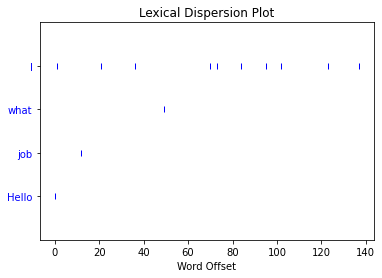

In [37]:
text.dispersion_plot(['I', 'what', 'job', 'Hello']) #za krotka konwersacja?

In [38]:
for dialog in dataset:
    if dataset[dialog]['experience_type']:
        for message in dataset[dialog]:
            speaker = message["speaker"]
            content = message["content"]
            if speaker == 'seeker':
                first_conv.append(content.split(' '))
                first_conv_str += content + " "
                
first_conv_str = first_conv_str.strip()

single_words_list = [item for sublist in first_conv for item in sublist]

TypeError: list indices must be integers or slices, not dict

### Fine-Grained Selection of Words

In [39]:
fdist = FreqDist(single_words_list)
sorted([w for w in set(fdist) if len(w)>7])

#len(w)>7 -> tylko wyrazy dluzsze od 7
#fdist[w]>7 -> czy pojawia się wiecej niz 7 razy

['Probably',
 'Sometimes',
 'consistently',
 'decision',
 'different',
 'feelings',
 'financial',
 'perspective',
 'quitting',
 'safeguards',
 'situations',
 'sometimes',
 'stressful',
 'upsetting']

### Collocation is a seq of words that occur together unusually often

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
bigrams = bigrams(['more', 'is', 'said', 'than', 'done'])

In [46]:
print(list(bigrams))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]


In [47]:
text.collocations() # no results, too short?

In [51]:
# distribution of word lengths

[len(w) for w in text]
fdist = FreqDist([len(w) for w in text])
fdist

# 36 słów na 4 litery, 33 słowa mają 3 litery itd.

FreqDist({4: 36, 3: 33, 2: 31, 1: 22, 5: 15, 6: 13, 9: 6, 8: 4, 7: 3, 10: 2, ...})

In [52]:
fdist.keys() # ilo-literowe są słowa

dict_keys([5, 1, 2, 6, 3, 7, 8, 9, 4, 10, 12, 11])

In [53]:
fdist.items() # to samo tylko w liście

dict_items([(5, 15), (1, 22), (2, 31), (6, 13), (3, 33), (7, 3), (8, 4), (9, 6), (4, 36), (10, 2), (12, 1), (11, 1)])

In [54]:
fdist.max() # których słów było najwięcej? 4-literowych

4

In [56]:
fdist[3] # 3-literowych było 33

33

In [58]:
fdist[4] # 3-literowych było 33

36

In [60]:
fdist.freq(4) # najwięcej było 4-literowych słów, prawie 22% wszystkich

0.2155688622754491

Can help us understand differences between authors, genres, languages

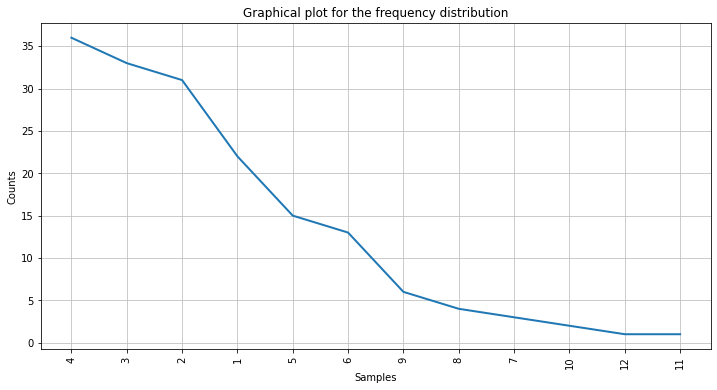

<AxesSubplot:title={'center':'Graphical plot for the frequency distribution'}, xlabel='Samples', ylabel='Counts'>

In [63]:
plt.figure(figsize=(12, 6))
plt.title('Graphical plot for the frequency distribution')
fdist.plot(50)
# Cumulative

## Data Preprocessing

In [ ]:
# Convert JSON data to a DataFrame
import pandas as pd

df = pd.io.json.json_normalize(dataset)
print(df.head(5))

In [ ]:
df.info() # different sizes

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df.fillna(method="ffill")

In [ ]:
for col in df:
    if type(df[col]) == 'object':
        df[col] = df[col].fillna(value='unknown')
    else:
        df[col] =df[col].fillna(value=0)

In [ ]:
df.isnull().sum().sum()

# Columns

In [ ]:
df['emotion_type'].value_counts()

In [ ]:
df['experience_type'].value_counts()

In [ ]:
df['problem_type'].value_counts()

In [ ]:
df['survey_score.seeker.empathy'].value_counts() # 1-5

In [ ]:
df['survey_score.seeker.final_emotion_intensity'].value_counts() # 1-4

In [ ]:
df['survey_score.seeker.initial_emotion_intensity'].value_counts() 
# 1-5 # good to show in pair: initial and final emotion intensity

In [ ]:
df['survey_score.seeker.relevance'].value_counts() # 2-5

In [ ]:
df['survey_score.supporter.relevance'].value_counts() # 0-5

# Dialog

In [ ]:
df['dialog'] # dialogs from whole dataset

In [ ]:
df['dialog'][0] # 1st dialog

In [ ]:
df['dialog'][0][0] # one statement with all information about who is talking etc.

In [ ]:
df['dialog'][0][0]['content'] # one statement

In [ ]:
df['dialog'][0][1]['content']

In [ ]:
statement = df['dialog'][0]

for i in statement:
    print(i['content'])

In [ ]:
# remove punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [ ]:
df['dialog'][0][0]['content']

In [ ]:
for conversation in df['dialog']:
    for single_conversation in conversation:
        single_conv = single_conversation['content']

In [ ]:
single_conv = single_conv.apply(lambda x: remove_punctuation(x))
single_conv.head()

# Lexical Dispersion Plot

In [ ]:
first_conv = ''
for conversation in df['dialog']:
    for single_conversation in conversation:
        single_conv = single_conversation['content']
        first_conv += single_conv

In [ ]:
first_conv

# Convert the string to an NLTK text object
text_object = nltk.Text(nltk.word_tokenize(first_conv))

# Create the ConcordanceIndex
concordance_index = nltk.ConcordanceIndex(text_object)

In [ ]:
file.close()